In [24]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web

%matplotlib inline

In [51]:
df = pd.read_csv('AAPL.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19362300
2513,2019-09-09,214.839996,216.440002,211.070007,214.169998,214.169998,27309400
2514,2019-09-10,213.860001,216.779999,211.710007,216.699997,216.699997,31777900
2515,2019-09-11,218.070007,223.710007,217.729996,223.589996,223.589996,44289600
2516,2019-09-12,224.800003,226.419998,222.860001,223.089996,223.089996,32226700


In [26]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], high=df["High"],
                                        low=df["Low"], close=df["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

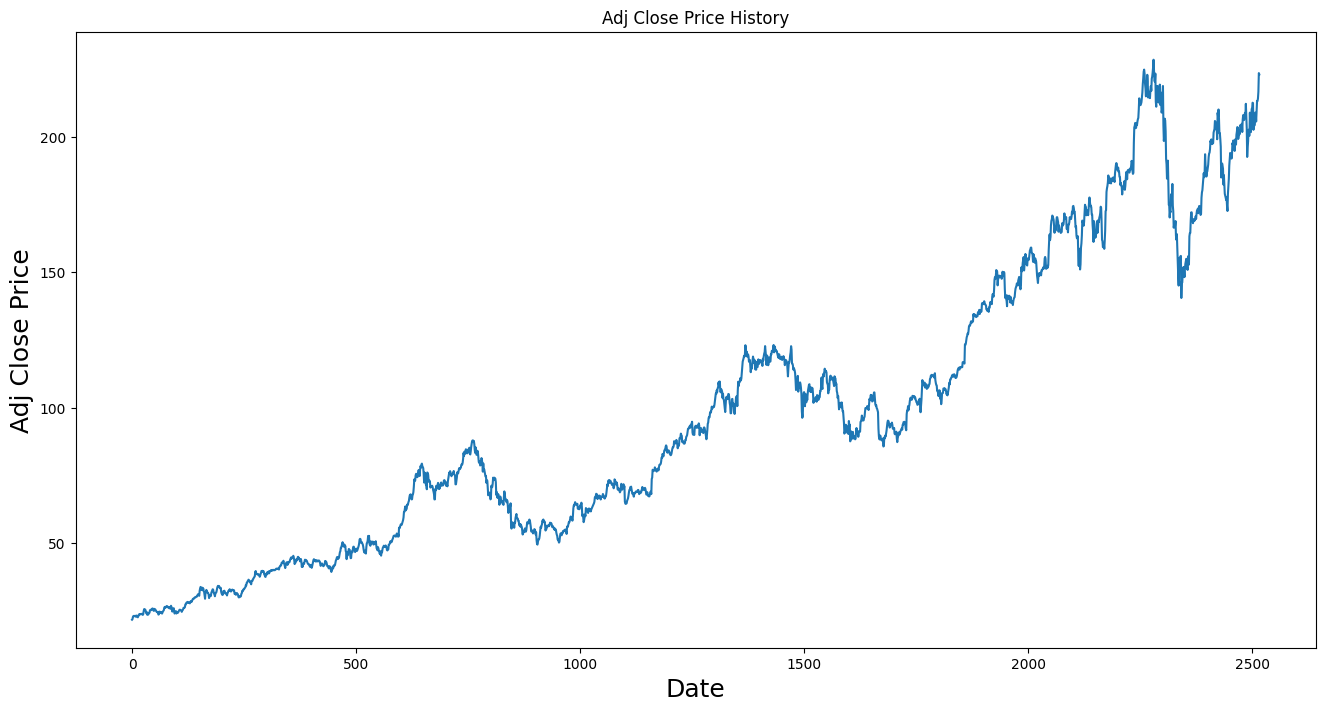

In [27]:
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price',fontsize=18)
plt.show()

In [28]:
data=df.filter(['Adj Close'])
dataset=data.values
train_len=math.ceil(len(dataset) * .8)
train_len

2014

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.00000000e+00],
       [8.67872776e-04],
       [4.91183709e-03],
       ...,
       [9.42842969e-01],
       [9.76149618e-01],
       [9.73732589e-01]])

In [30]:
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]
for i in range(90,len(train_data)):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    if i<=91:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00086787, 0.00491184, 0.00652701, 0.0068103 ,
       0.0062076 , 0.00648486, 0.00709957, 0.00608708, 0.00521315,
       0.0074913 , 0.00702723, 0.00700917, 0.00430311, 0.00673795,
       0.00741296, 0.00981763, 0.00996228, 0.00937166, 0.01009487,
       0.01029979, 0.00982368, 0.01058905, 0.01014911, 0.00863641,
       0.00972723, 0.01509108, 0.01880358, 0.01897235, 0.01821292,
       0.01733303, 0.01425337, 0.01125803, 0.01363863, 0.00890759,
       0.0093958 , 0.00905827, 0.01029979, 0.01224039, 0.01242723,
       0.0167183 , 0.01763437, 0.0177971 , 0.01703775, 0.01852031,
       0.01983415, 0.02005711, 0.01943038, 0.01614576, 0.01579017,
       0.01938214, 0.01851427, 0.01836362, 0.01619398, 0.01578413,
       0.01401228, 0.0135663 , 0.01371695, 0.01181252, 0.00917882,
       0.00973326, 0.01451251, 0.01368684, 0.01262613, 0.0140183 ,
       0.0123248 , 0.0128431 , 0.0109326 , 0.01308414, 0.01477164,
       0.01605537, 0.01710401, 0.02128661, 0.02283545, 0.0213

In [31]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [32]:
x_train.shape

(1924, 90)

In [33]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [34]:
test_data=scaled_data[train_len-90:,:]
x_test=[]
y_test=dataset[train_len:,:]
for i in range(90,len(test_data)):
    x_test.append(test_data[i-90:i,0])

In [35]:
x_test=np.array(x_test)

In [36]:
predictions=model.predict(x_test)
predictions.shape
predictions=np.reshape(predictions,(predictions.shape[0],1))
predictions=scaler.inverse_transform(predictions)
predictions

array([[156.27486161],
       [154.39773882],
       [154.21591058],
       [155.55878273],
       [153.25811602],
       [154.96678141],
       [151.02086336],
       [149.33456019],
       [146.89410937],
       [146.51562362],
       [148.63605475],
       [149.06618599],
       [148.93540059],
       [148.78330456],
       [149.10807119],
       [148.4479727 ],
       [149.10042611],
       [150.89305331],
       [151.56494946],
       [151.4732072 ],
       [150.70382652],
       [151.81867873],
       [151.65005966],
       [153.35952692],
       [155.0260205 ],
       [155.35355555],
       [154.33475753],
       [151.20030747],
       [152.10768665],
       [151.74192379],
       [153.42007808],
       [151.29100704],
       [152.8555991 ],
       [158.81401394],
       [161.94670033],
       [164.02042667],
       [161.97159924],
       [163.34864184],
       [167.95060293],
       [168.74672322],
       [169.53003423],
       [171.52617714],
       [170.46310692],
       [170

In [37]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.1943445727993938

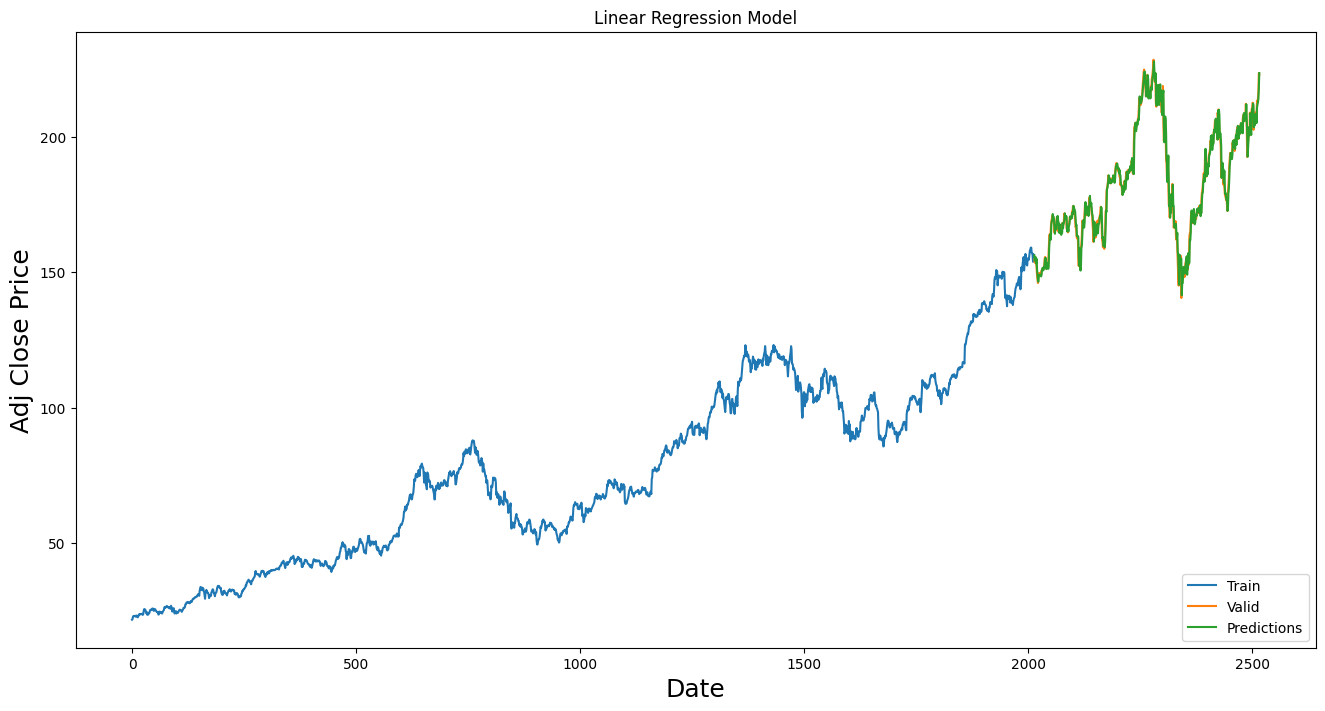

In [38]:
train=data[:train_len].copy()
valid=data[train_len:].copy()
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

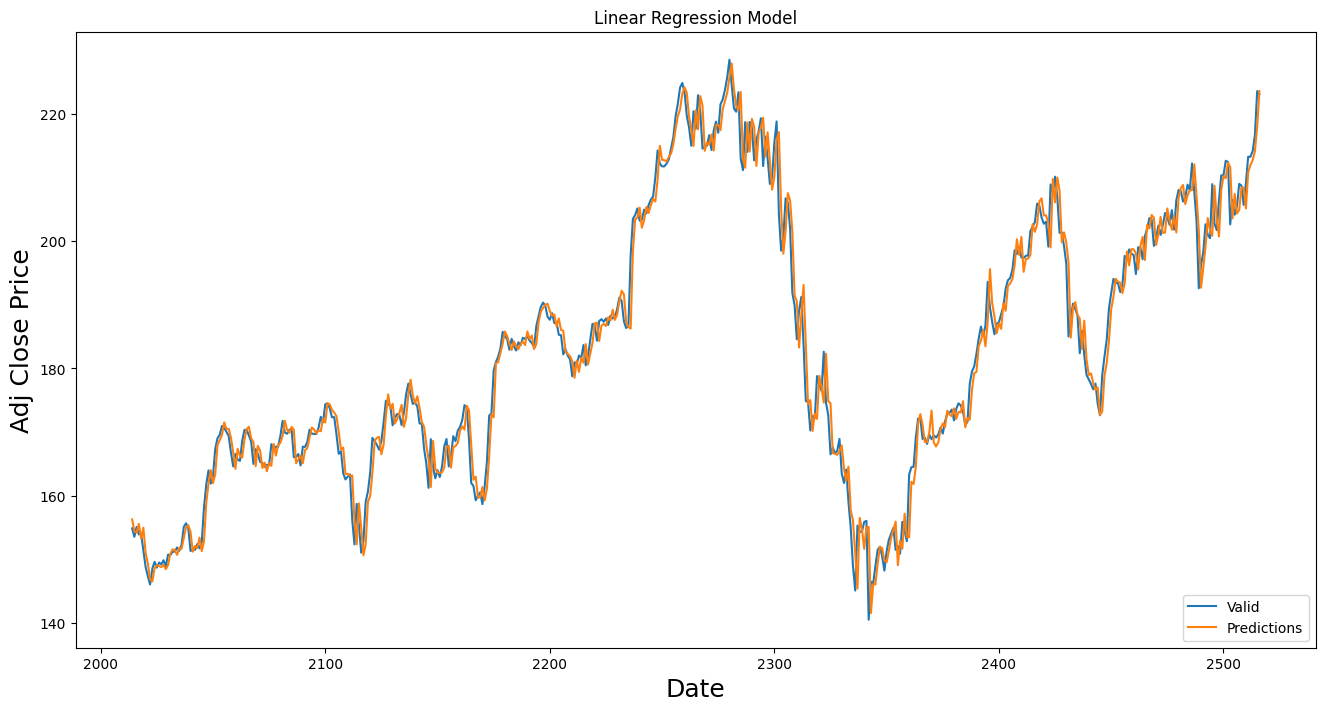

In [39]:
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price',fontsize=18)
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Valid','Predictions'],loc='lower right')
plt.show()

In [40]:
valid

,Adj Close,Predictions
2014,154.868790,156.274862
2015,153.539841,154.397739
2016,155.091934,154.215911
2017,153.918137,155.558783
2018,153.976364,153.258116
...,...,...
2512,213.259995,211.954435
2513,214.169998,212.752253
2514,216.699997,214.127330
2515,223.589996,217.952989


In [50]:
import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names')

a=pd.read_csv('AAPL.csv')
new_df=a.filter(['Adj Close'])
l_90=new_df[-90:].values
l_90_scaled=scaler.transform(l_90)
X_test=[]
X_test.append(l_90_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]))
pred_price=model.predict(X_test)
pred_price=np.reshape(pred_price,(pred_price.shape[0],1))
pred_price=scaler.inverse_transform(pred_price)

print(pred_price)

[[221.59015336]]
